In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [14]:
# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.

def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients (w1, w2)
    b : regression function intercept - refers to the y-intercept of the linear equation: w2
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step - w1
    b_new : intercept following gradient descent step - w2
    """
    
    """
    y = w1 * x + w2

    Here:

    y is the target variable (the actual value you're trying to predict).
    x is the predictor feature.
    w1 is the coefficient (slope) associated with the predictor feature.
    w2 is the y-intercept, which is the value of y when x is 0.
    
    
    (x, y) = (X[0], y[0])
    """
    
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    # # TODO: compute errors
    # for key,_ in range(X):
    #     y_pred = W*X[key]+b
    #     error = ((y[0] - y_pred)**2) * 1/2

    # # y_pred = None # y^=w1x+w2
    
    # # TODO: compute steps
    # W_new = None
    # b_new = None
    
    return W_new, b_new

In [11]:
# The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.

def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    
    # X is a numpy array. the shape function gives the dimensions of this array
    # since de data.csv file has initially 100 lines, and X represents all the
    # x point values, the array will be composed of 100 rows, and a single column 
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


In [5]:
# Import data from CSV file
data = np.loadtxt('data.csv', delimiter = ',')
# The slicing operation [:,:-1] selects all rows and all columns except the last column.
X = data[:,:-1]
# The : before the comma indicates that we want to select all rows of the array. The -1 after the comma specifies that we want to select the last column of the array.
y = data[:,-1]

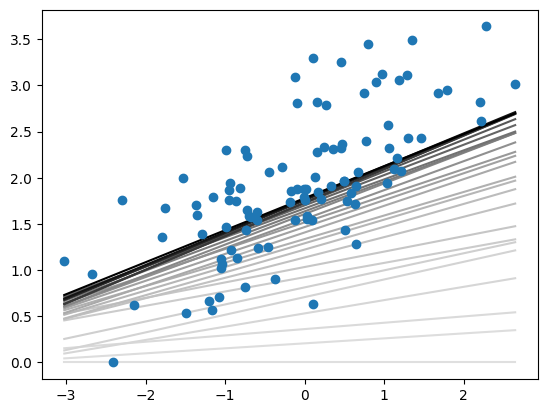

In [15]:
regression_coef = miniBatchGD(X, y)

# Plot the regression coefficient
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()